In [25]:
#import libraries 
from pandas import *
import numpy as np 
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
from pykrige.uk import UniversalKriging
from pykrige.ok import OrdinaryKriging

In [26]:
#read in data
data = read_csv("merged.csv")

In [27]:
#extract latitude and longitude from csv and store in array 
lons = np.array(data['Stn_long'])
lats = np.array(data['Stn_lat'])

#set grid bounds 
xmin = np.min(lons) -0.01
xmax = np.max(lons) + 0.01

ymin = np.min(lats) -0.01
ymax = np.max(lats) + 0.01

# grids for long and lat using 75 bins
grid_lon = np.linspace(xmin, xmax, 75)
grid_lat = np.linspace(ymin, ymax, 75)

Adjusting data for anisotropy...
Initializing variogram model...
Using 'linear' Variogram Model
Slope: 3.30115150130376
Nugget: 2.9945778183128997 

Calculating statistics on variogram model fit...
Q1 = 0.26831979613664886
Q2 = 1.191102365360027
cR = 5.065172548741798 

Initializing drift terms...
Executing Universal Kriging...



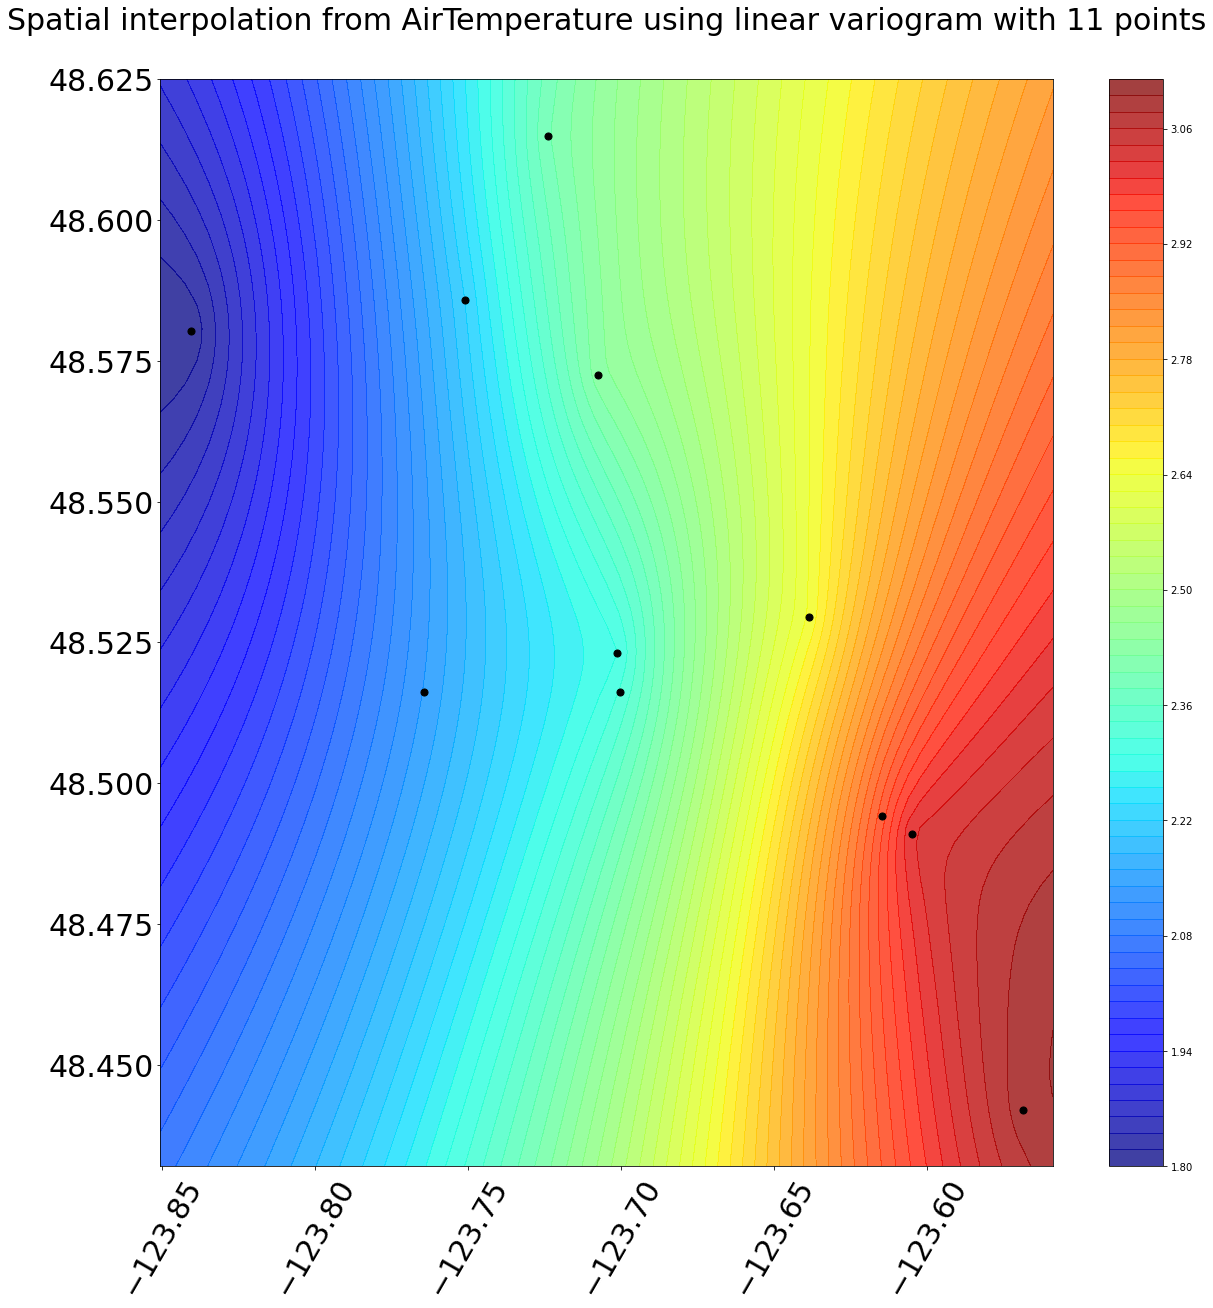

Adjusting data for anisotropy...
Initializing variogram model...
Using 'linear' Variogram Model
Slope: 429.71574066257165
Nugget: 70.89526210470456 

Calculating statistics on variogram model fit...
Q1 = 1.0315292548526758
Q2 = 7.519823665241962
cR = 1038.123060331748 

Initializing drift terms...
Executing Universal Kriging...



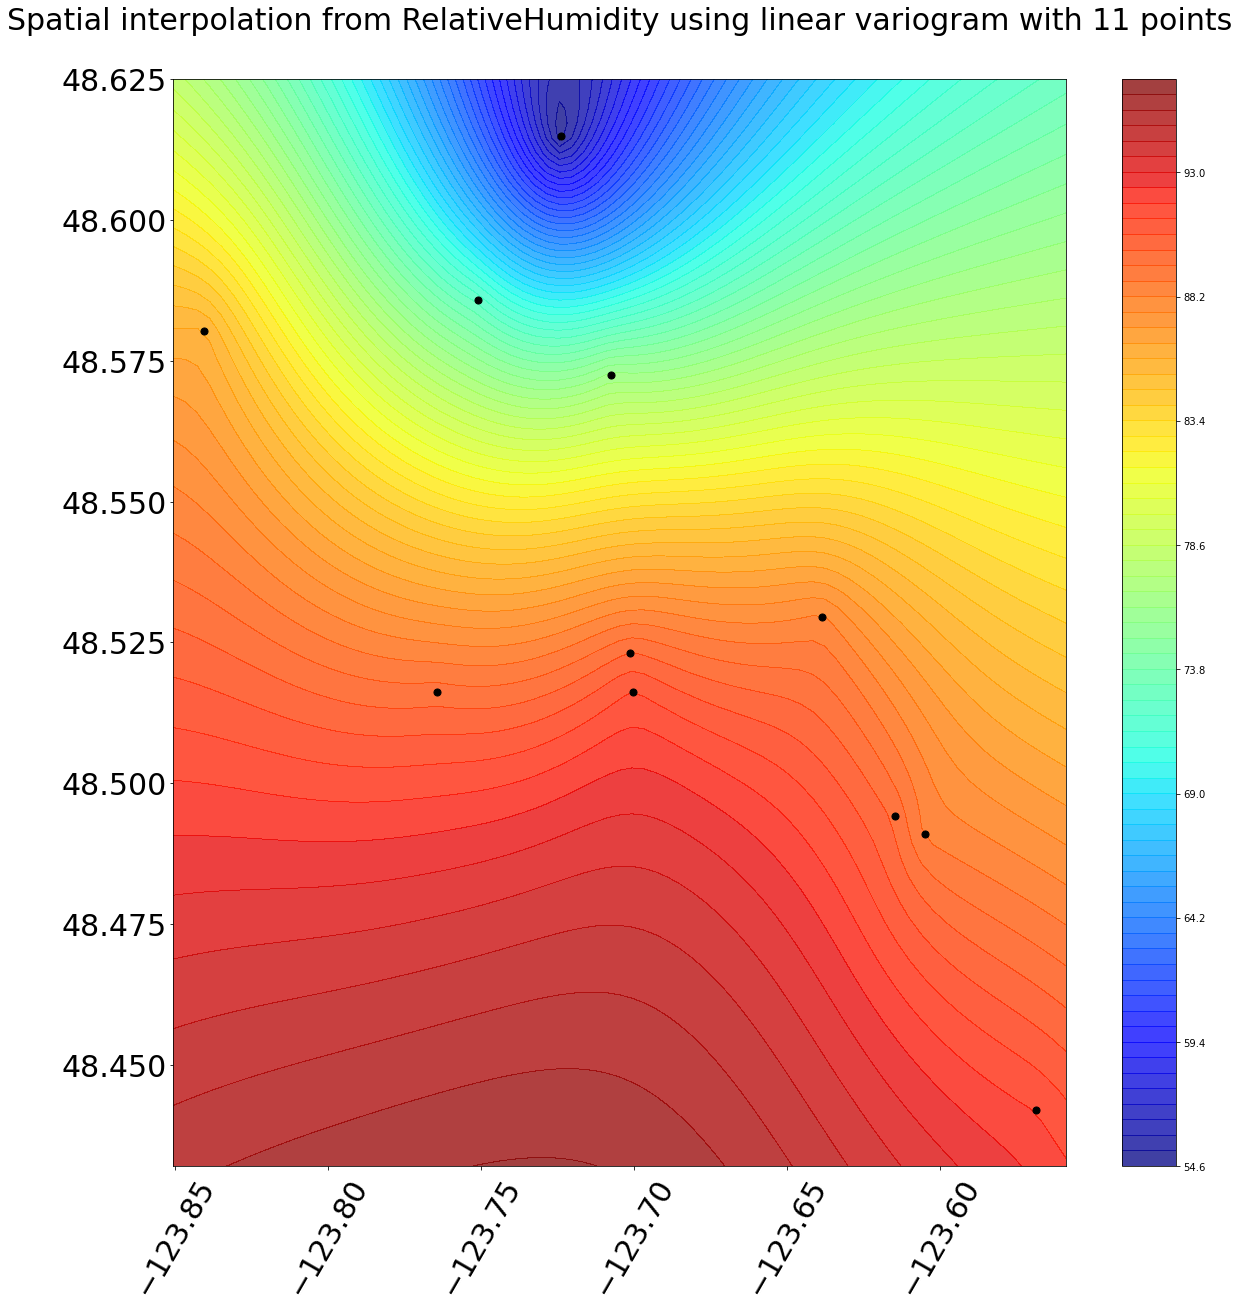

Adjusting data for anisotropy...
Initializing variogram model...
Using 'linear' Variogram Model
Slope: 296.4733175672463
Nugget: 5.804152055126138 

Calculating statistics on variogram model fit...
Q1 = 0.5957430864227261
Q2 = 2.2465422920088636
cR = 71.9854158738397 

Initializing drift terms...
Executing Universal Kriging...



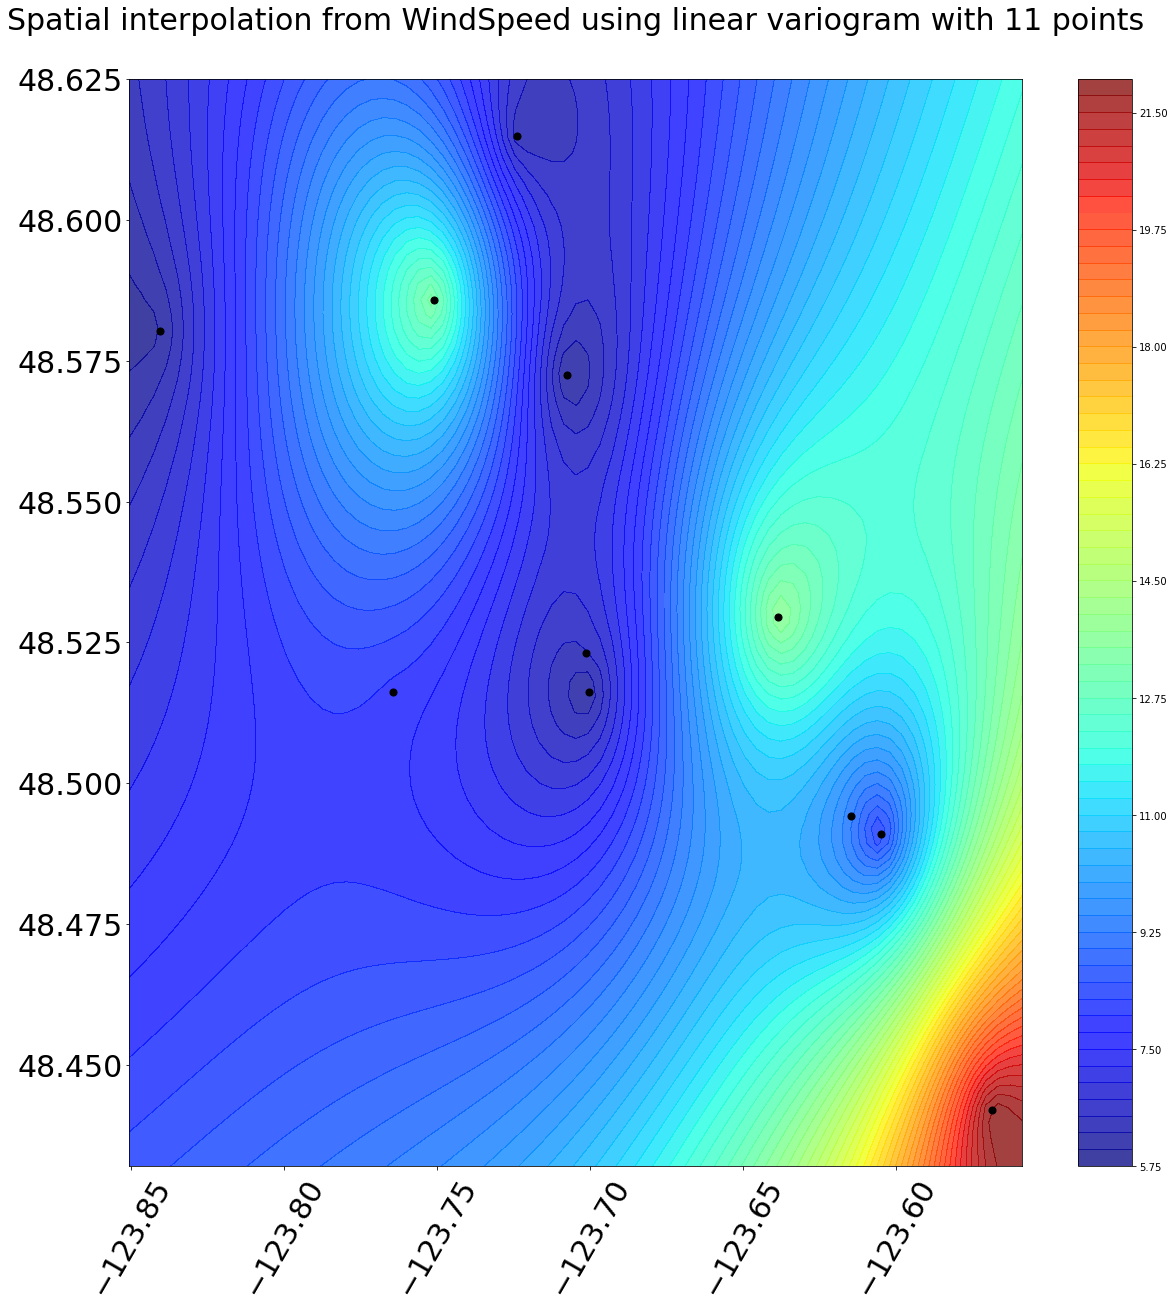

Adjusting data for anisotropy...
Initializing variogram model...
Using 'linear' Variogram Model
Slope: 3.855693805681834e-10
Nugget: 2.343739410866952 

Calculating statistics on variogram model fit...
Q1 = 4.6619370960440625
Q2 = 183.30475813917127
cR = 546.037324178754 

Initializing drift terms...
Executing Universal Kriging...



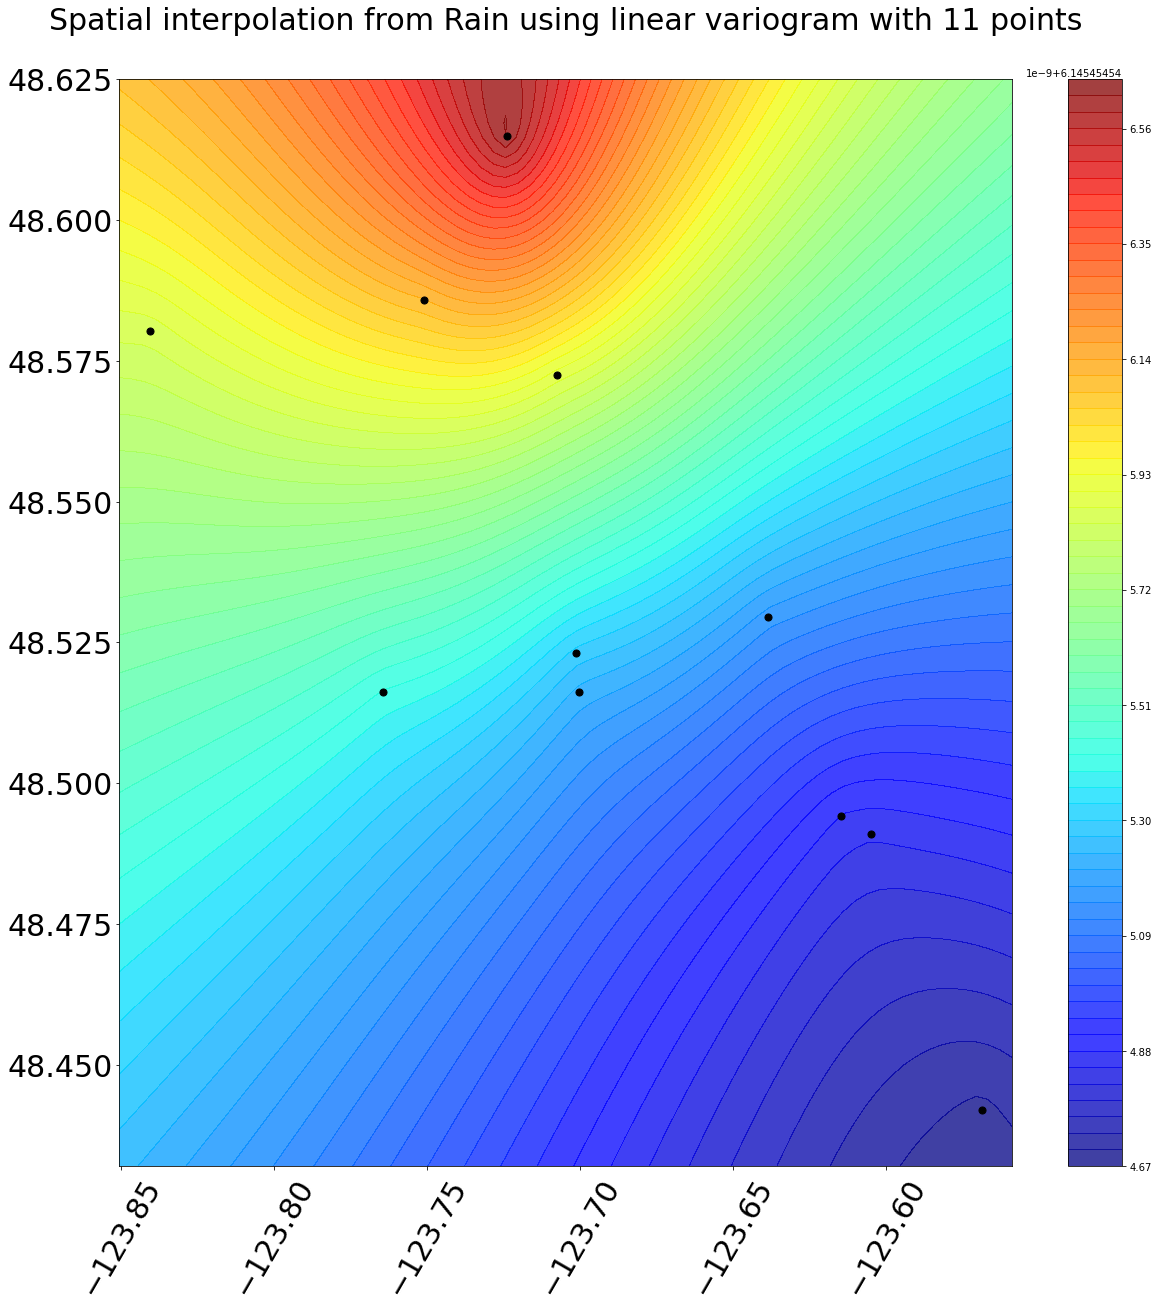

In [28]:
# list of variables to create kriging models for
var = ['AirTemperature','RelativeHumidity','WindSpeed', 'Rain']

# loop through variables list
for i in var:
  
    # specify z data
    zdata = np.array(data[i])
    
    # set kriging object with x,y,z data using linear variogram model and 20 bins
    UK = UniversalKriging(lons, lats, zdata, variogram_model='linear', verbose=True, enable_plotting=False,nlags=20)
   
    # pass grid to execute function and interpolate values at unkown locations (z1) as well as the uncertainty (ss1)
    z1, ss1 = UK.execute('grid', grid_lon, grid_lat)


    xintrp, yintrp = np.meshgrid(grid_lon, grid_lat) 

    #set figure dimensions 
    fig, ax = plt.subplots(figsize=(20,20))

    #plot x,y,z data on contoured surface
    contour = plt.contourf(xintrp, yintrp, z1,len(z1),cmap=plt.cm.jet,alpha = 0.75) 


    plt.colorbar(contour)


    # plot station locations
    plt.scatter(lons, lats,marker='o',c='k', s = 50)

    # x and y markers
    plt.xticks(fontsize = 30, rotation=60)
    plt.yticks(fontsize = 30)

    npts = len(lons)
    #plot title
    plt.title(f'Spatial interpolation of {i} using linear variogram with {npts} points',fontsize = 30, y =1.04)
    plt.show()